# Week 6: Spectral Graph Theory

Today we will work with graphs. Therefore, we need a python library for representing graphs. 
In particular, we will need `networkx`.
Please run the following commands in your anaconda environment:

```bash
> pip install networkx
```

Afterwards, you should be able to restart your kernel and successfully run the following imports.

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import networkx as nx

%matplotlib inline

## Exercise 1: Graphs and Their Spectrums

In this exercise, we will look at the spectrum of a complete graph, a cycle graph (2-regular), and a random 3-regular graph, respectively.
Read and run the code below and consider the eigenvalues plotted.

1. Describe the differences in the eigenvalues for the three graphs
2. Run the code a couple of times and observe what happens to the largest eigenvalue of the random 3-regular graph.

Sum of lambdas
  G1  |  G2   |  G3  
8.000 | 8.000 | 8.000 



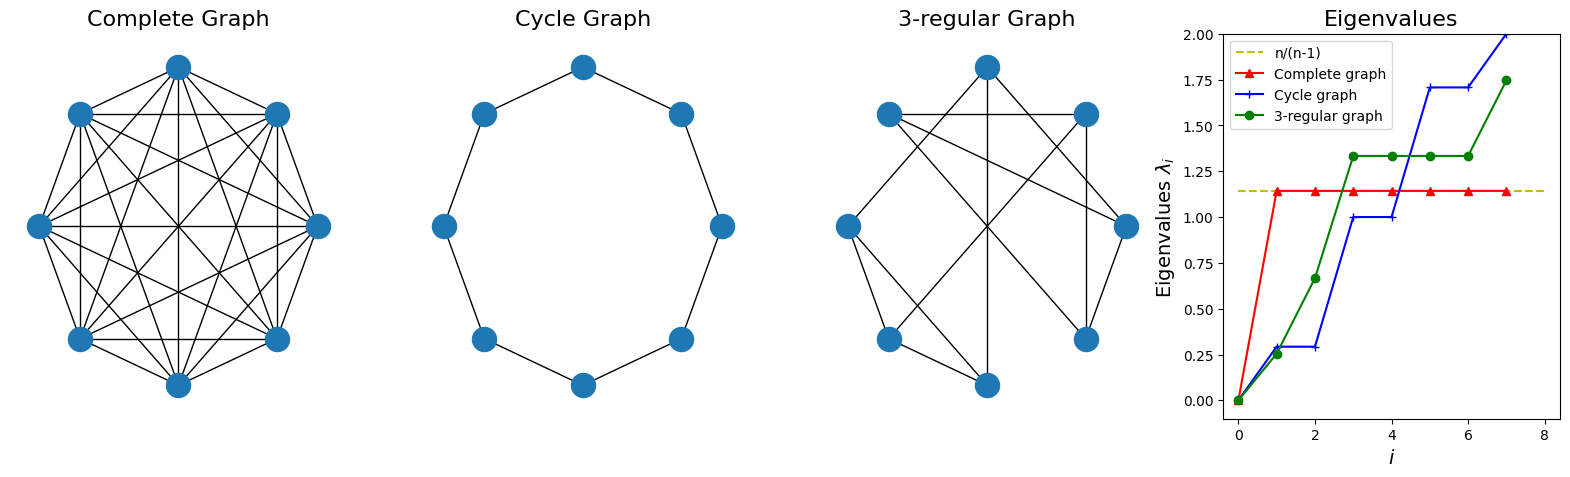

In [114]:
def graph_eig(G): 
    """
        Takes a graph and returns the eigenvalues and eigenvectors of its normalized Laplacian matrix (L = D^{-1/2}(D-A)D^{-1/2})
    """
    A  = nx.to_numpy_array(G)
    D  = A.sum(axis=1)
    D_ = 1. / np.sqrt(D)
    D_ = np.diag(D_)
    L  = D_ @ (np.diag(D)-A) @ D_
    
    lambdas, eigenvectors = np.linalg.eig(L)
    
    order = np.argsort(lambdas)
    lambdas = lambdas[order]
    eigenvectors = eigenvectors[:, order]
    
    return lambdas, eigenvectors

G1 = nx.complete_graph(8)             # Complete graph
G2 = nx.cycle_graph(8)                # Cycle graph
G3 = nx.random_regular_graph(3, 8)    # Random 3-regular graph

l1, e1 = graph_eig(G1)
l2, e2 = graph_eig(G2)
l3, e3 = graph_eig(G3)

fig, ax = plt.subplots(1,4, figsize=(20, 5))

ax[0].set_title("Complete Graph", fontsize=16)
nx.draw_circular(G1, ax=ax[0])
ax[1].set_title("Cycle Graph", fontsize=16)
nx.draw_shell(G2, ax=ax[1])
ax[2].set_title("3-regular Graph", fontsize=16)
nx.draw_shell(G3, ax=ax[2])

ax[3].set_title("Eigenvalues", fontsize=16)
ax[3].set_xlabel('$i$', fontsize=14)
ax[3].set_ylabel('Eigenvalues $\lambda_i$', fontsize=14)
ax[3].plot([0, 8], [8/7., 8/7.], 'y--', label="n/(n-1)")
ax[3].plot(l1,'r^-', label='Complete graph')
ax[3].plot(l2,'b+-', label='Cycle graph')
ax[3].plot(l3,'go-', label='3-regular graph')
ax[3].set_ylim([-0.1,2.0])
ax[3].legend()

print("Sum of lambdas")
print("  G1  |  G2   |  G3  ")
print("%.3f | %.3f | %.3f " % (l1.sum(), l2.sum(), l3.sum()))
print()

## Solution
1. 
For the complete graph we see that all the eigenvalues are around 1 and have the same value. This shows that there is high connectivity between these
For the Cycle graph we see that the largest of the eigenvalues is 2 which is the maximum for a normalized laplacian matrix. Since it is around 2 it means that there is expected some long paths and the second smallest value which is way lower than the largest indicates that the informations spreads slowly. Furthermore the gradually increase show us that it is not very well connected.
For the last one we see that this actually depends on the graph. The largest one is around 2, and not nearly close to one as the complete graph. The spread is somewhere in betweeen $K_n$ and $C_n$ which shows a moderate level of connectivity. The gap between the values seems also somewhere in the middle between the two others, which indicates that there is an intermediate speed of delivering information. 

2. We see that it changes due to the change of the graph

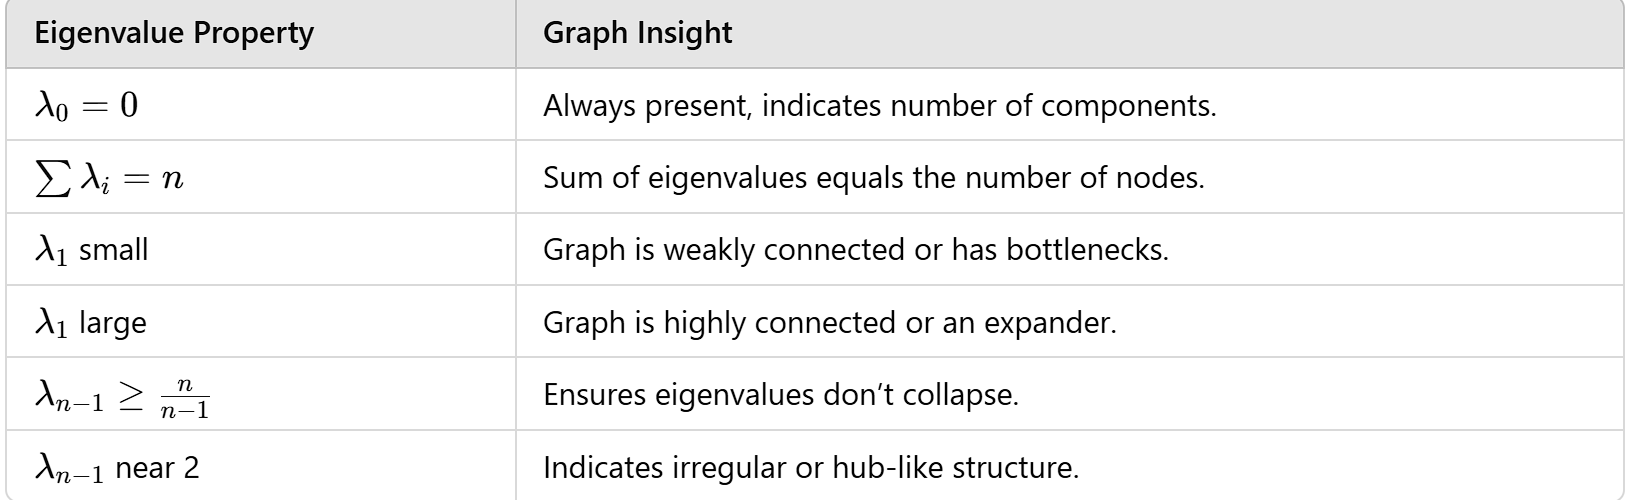
Hub-like means that there is a node which have a very high degree compared to the rest


## Exercise 2: Spectral Properties of the Graph Laplacian
If we take a closer look at the spectrum above, we observe the following properties:

1. $\lambda_0 = 0$ for all graphs
1. For all the graphs $\sum_{i=0}^{n-1} \lambda_i = n$
1. For all the graphs, $\lambda_1 \leq \frac{n}{n-1}$
1. For all the graphs, $\lambda_{n-1} \geq \frac{n}{n-1}$
1. $*$ For the complete graph, $\lambda_1, \dots, \lambda_{n-1} = \frac{n}{n-1}$ 

**(Question with * might have a high probability for occuring in hand-in)**

In the following, let $A$ be the adjacency matrix and $[D]_{i,i} = \sum_{j}A_{i, j}$ is the degree matrix.
We refer to eigenvalues $\lambda_i$s of the normalized laplacian $\mathcal{L} = D^{-1/2}LD^{-1/2} = I - D^{-1/2}AD^{-1/2}$.

We will now prove the five observations:

**2.1) $\lambda_0$ is always $0$**  
Prove that the smallest eigenvalue $\lambda_0 = 0$ for any graph.

**2.2) Sum of the spectrum**  
Prove that if a graph $G$ with $n$ nodes is connected, i.e., there are no isolated nodes, then 
$$
\sum_{i=0}^{n-1} \lambda_i = n
$$

_Hint:_ Recall [the relationship](https://en.wikipedia.org/wiki/Trace_%28linear_algebra%29#Eigenvalue_relationships) between eigenvalues and the trace. 

**2.3) Upper bound on $\lambda_1$**  
Prove that if a graph $G$ is connected, then 
$$
\lambda_1 \leq \frac{n}{n-1}
$$

**2.4) Lower bound on $\lambda_{n-1}$**  
Prove that if a graph $G$ is connected, then 
$$
\lambda_{n-1} \geq \frac{n}{n-1}
$$

**2.5) Tight bound for complete graphs**  
To prove that for all complete graphs, $\lambda_0 = 0$ and $\lambda_i = \frac{n}{n-1}$ for $i=1, \dots, n-1$.


**2.1 $\lambda_0=0$ for all graphs**
- $L_{norm}=I-D^{-1/2}AD^{-1/2}$
- The all ones vectors $\textbf{1}$ is always an eigenvector of the Laplacian with eigenvalue 0
- This follows from the fact that the sum of each row in $D^{-1/2}AD^{-1/2}$ is equal to 1, so $L_{norm}\textbf{1}=0$

**2.2 $\sum_{i=0}^{n-1}\lambda_i=n$**
- The trace of any matrix is the sum of its eigenvalues
- $L_{norm}=I-D^{-1/2}AD^{-1/2}$
- $Tr(L_{norm})=Tr(I)- Tr(D^{-1/2}AD^{-1/2})$
- $I$ has trace $n$ and $Tr(D^{-1/2}AD^{-1/2})=n-\sum_{i=0}^{n-1}\lambda_i$
- $n-\sum_{i=0}^{n-1}\lambda_i=0 \Leftrightarrow \sum_{i=0}^{n-1}\lambda_i=n$

**2.3 $\lambda_1\leq \frac{n}{n-1}$**
- The smallest nonzero eigenvalue is related to connectivity 
- A well known bound states $\Lambda_1 \leq 1+\frac{1}{d_{min}-1}$, where $d_{min}$ is the smallest degree in a graph 
- In the worst case scenario $d_{min}=n-1$, which gives $\lambda_1\leq \frac{n}{n-1}$

**2.4 $\lambda_{n-1}\geq \frac{n}{n-1}$**
- The largest eigenvalue satisfies $\lambda_{n-1}\geq \max\left(1+\frac{1}{d_max-1}\right)$ where $d_{max}$ is the largest degree 
- Since the complete graph has $d_{max}=n-1$, which is the highest possible degree then we get  $\lambda_{n-1}\geq \frac{n}{n-1}$

**2.5 $\lambda_1,...,\lambda_{n-1}=\frac{n}{n-1}$**
- For $K_n$ we have the following:
    - $L_{norm}= I- \frac{1}{n-1}A$
    - The adjacency matrix of $K_n$ has 
        - Eigenvalue $n-1$ with mulplicity 1
        - Eigenvalue $-1$ with mulplicity $n-1$
    - Applying the transformation $I-\frac{1}{n-1}A$ the eigenvalues become $1-\frac{n-1}{n-1}=0 \quad 1-\frac{-1}{n-1}=\frac{n}{n-1}$
    - Since -1 appears $n-1$ times in $A$ the value $\frac{n}{n-1}$ appears $n-1$ times in $L_{norm}$ 


## Exercise 3: Karate World

In this exercise, we will look at Zachary's Karate club.
Run the code below to visualize it.

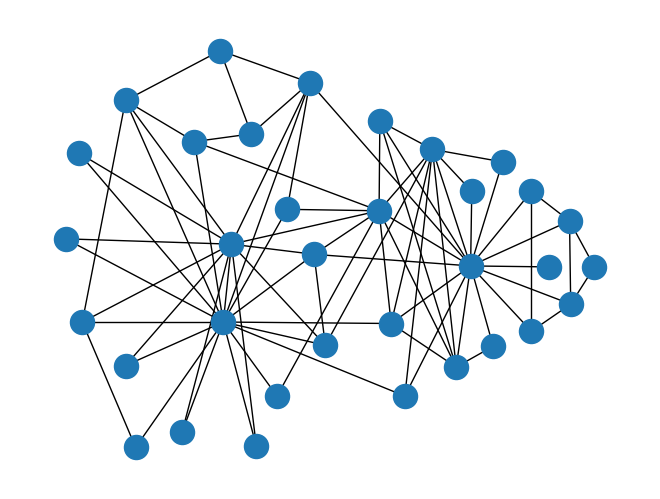

In [115]:
karate = nx.Graph()
karate.add_edges_from([(1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9), (1,11), (1,12), (1,13), (1,14), (1,18), (1,20), (1,22), (1,32), (2,3), (2,4), (2,8), (2,14), (2,18), (2,20), (2,22), (2,31), (3,4), (3,8), (3,9), (3,10), (3,14), (3,28), (3,29), (3,33), (4,8), (4,13), (4,14), (5,7), (5,11), (6,11), (6,17), (6,7), (7,17), (9,31), (9,33), (9,34), (10,34), (14,34), (15,33), (15,34), (16,33), (16,34), (19,33), (19,34), (20,34), (21,33), (21,34), (23,33), (23,34), (24,26), (24,28), (24,30), (24,33), (24,34), (25,26), (25,28), (25,32), (26,32), (27,30), (27,34), (28,34), (29,32), (29,34), (30,33), (30,34), (31,33), (31,34), (32,33), (32,34), (33,34)])
fixed_positions = {1:(10.74,4.07),2:(9.76,6.48),3:(8.39,5.21),4:(10.37,1.98),5:(12.30,5.61),6:(13.31,3.28),7:(13.28,5.00),8:(8.41,7.06),9:(6.72,4.31),10:(5.77,1.38),11:(12.30,2.72),12:(12.75,4.05),13:(11.32,2.41),14:(8.70,2.88),15:(3.33,0.63),16:(1.88,2.01),17:(13.92,4.05),18:(10.77,5.61),19:(0.69,6.40),20:(9.05,1.38),21:(0.34,4.63),22:(11.56,6.22),23:(5.24,0.34),24:(1.88,7.49),25:(5.11,6.80),26:(4.31,8.52),27:(2.14,0.32),28:(3.65,6.64),29:(6.03,5.24),30:(0.77,2.91),31:(7.01,2.43),32:(6.61,7.86),33:(4.60,4.52),34:(4.39,2.91)}
nx.draw(karate,pos=fixed_positions)
plt.show()

Text(0.5, 1.0, 'Karate spectrum')

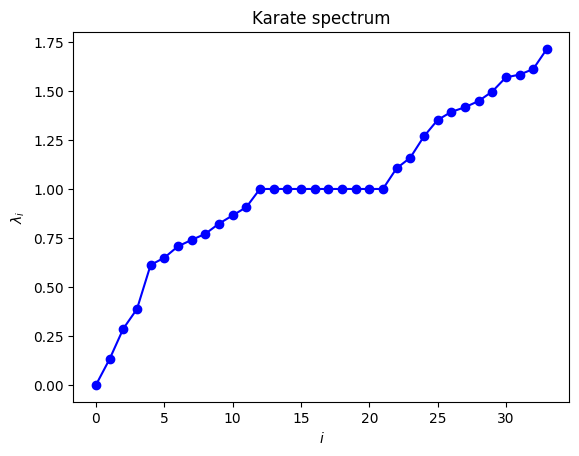

In [116]:
lk, ek = graph_eig(karate)
fig, ax = plt.subplots(1,1)
ax.plot(lk, 'b-o')
ax.set_xlabel("$i$")
ax.set_ylabel("$\lambda_i$")
ax.set_title("Karate spectrum")

The plot of the spectrum looks as expected. Let's 
look at the properties of the eigenvectors of the graph.

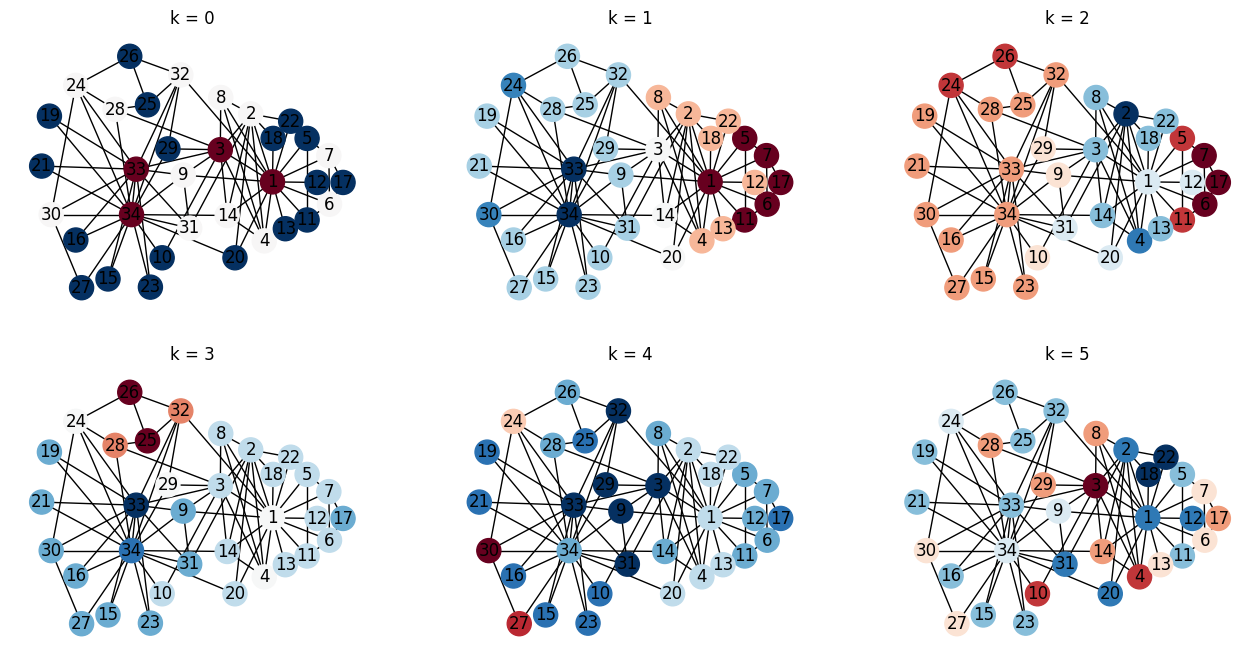

In [117]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
ek_ = np.around(ek, decimals=1)
for k in np.arange(0,6): 
    i, j = k // 3, k % 3
    ncs = ek_[:,k]
    nx.draw(karate, ax=ax[i, j], cmap=plt.get_cmap('RdBu'), node_color=ncs, pos=fixed_positions, with_labels=True)
    ax[i, j].set_title("k = %i" % k)

**Exercise 3.1**  
 - What happens to the node coloring as $k$ increases? 
 - Do you observe anything surprising?
 - How does what we see here relate to Spectral Clustering?

## Solution
1. We see that the number of colors increases since we now get more clusters when $k$ increases. 
2. Especially in the last $k=5$ it is seen that there is quite a mix of the partitionings, compared to the others 
3. You use the $k$ first eigenvectors of the Laplacian to reduce the data to a lower i dimension and afterwards use a algorithm to determine the clusters. Like K-means or something like that

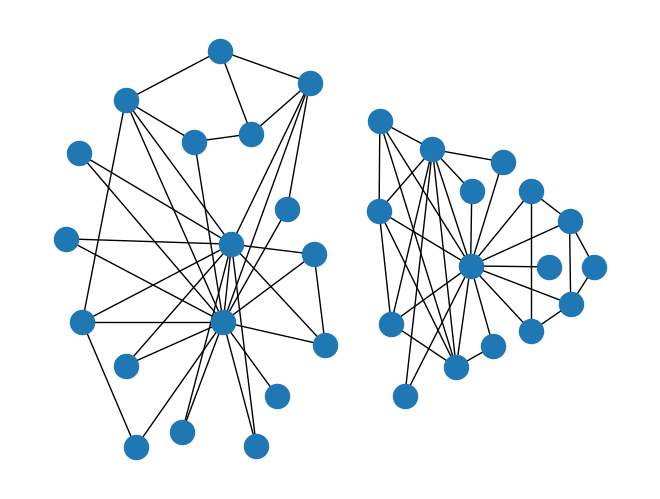

In [118]:
karate2 = nx.Graph()
karate2.add_edges_from([(1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,11), (1,12), (1,13), (1,14), (1,18), (1,20), (1,22), (2,3), (2,4), (2,8), (2,14), (2,18), (2,20), (2,22), (3,4), (3,8), (3,14), (4,8), (4,13), (4,14), (5,7), (5,11), (6,11), (6,17), (6,7), (7,17), (9,31), (9,33), (9,34), (10,34), (15,33), (15,34), (16,33), (16,34), (19,33), (19,34), (21,33), (21,34), (23,33), (23,34), (24,26), (24,28), (24,30), (24,33), (24,34), (25,26), (25,28), (25,32), (26,32), (27,30), (27,34), (28,34), (29,32), (29,34), (30,33), (30,34), (31,33), (31,34), (32,33), (32,34), (33,34)])
fixed_positions = {1:(10.74,4.07),2:(9.76,6.48),3:(8.39,5.21),4:(10.37,1.98),5:(12.30,5.61),6:(13.31,3.28),7:(13.28,5.00),8:(8.41,7.06),9:(6.72,4.31),10:(5.77,1.38),11:(12.30,2.72),12:(12.75,4.05),13:(11.32,2.41),14:(8.70,2.88),15:(3.33,0.63),16:(1.88,2.01),17:(13.92,4.05),18:(10.77,5.61),19:(0.69,6.40),20:(9.05,1.38),21:(0.34,4.63),22:(11.56,6.22),23:(5.24,0.34),24:(1.88,7.49),25:(5.11,6.80),26:(4.31,8.52),27:(2.14,0.32),28:(3.65,6.64),29:(6.03,5.24),30:(0.77,2.91),31:(7.01,2.43),32:(6.61,7.86),33:(4.60,4.52),34:(4.39,2.91)}
nx.draw(karate2,pos=fixed_positions)
plt.show()

**Exercise 3.2:**  
In the above graph, we have cut some edges to form two connected components.
What will happen to the spectrum of this simpler graph?

If you want, you can try to plot the spectrum and see if you were right.

Text(0.5, 1.0, 'Karate spectrum')

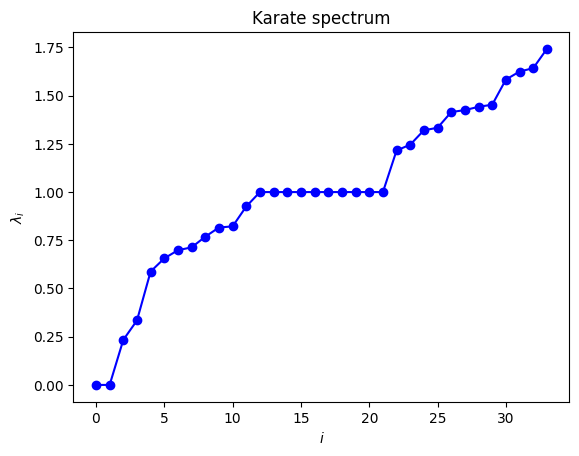

In [119]:
# TODO Plot spectrum.
# lambdas, eig_vectors = graph_eig(karate2)

lk, ek = graph_eig(karate2)
fig, ax = plt.subplots(1,1)
ax.plot(lk, 'b-o')
ax.set_xlabel("$i$")
ax.set_ylabel("$\lambda_i$")
ax.set_title("Karate spectrum")


## Solution

We see that since we have two connected graphs, then we must have that both $\lambda_0$ and $\lambda_1$ is equal to zero. 

## Exercise 4: Other spectrums

Please find the spectrums of different symmetric matrices, computed from the karate graph, below. 
Write code to plot them and explain how the spectrums differ.

In particular, what can you say about the sum of the spectrums and the bounds on the eigenvalues?

c:\Users\jaco6\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\linalg\spectrum.py:110: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return sp.linalg.eigvals(nx.adjacency_matrix(G, weight=weight).todense())
<class 'networkx.utils.decorators.argmap'> compilation 20:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
c:\Users\jaco6\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\jaco6\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


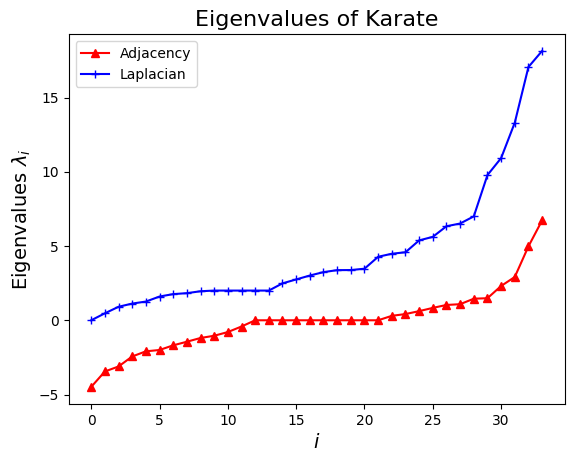

In [120]:
# Returns eigenvalues of the adjacency matrix of G.
lA = nx.adjacency_spectrum(karate)
lA = np.sort(lA)


# Returns eigenvalues of the Laplacian of G
lL = nx.laplacian_spectrum(karate)
lL = np.sort(lL)

# # Return eigenvalues of the normalized Laplacian of G
# lN = nx.normalized_laplacian_spectrum(karate)
# lN = np.sort(lN)


fig, ax = plt.subplots(1,1)

ax.set_title("Eigenvalues of Karate", fontsize=16)
ax.set_xlabel('$i$', fontsize=14)
ax.set_ylabel('Eigenvalues $\lambda_i$', fontsize=14)
ax.plot(lA,'r^-', label='Adjacency')
ax.plot(lL,'b+-', label='Laplacian')
# ax[3].plot(lN,'go-', label='Normalized Laplacian')
ax.legend()

## Exercise 5: Spectral Clustering
In this exercise, we are going to implement the spectral clustering algorithm. 
Recal, that the algorithm has three steps:

1. Construct nearest-neighbor-graph of the data.
2. Do the eigen-decomposition of the graph Laplacian
3. Use K-means to cluster the features of the eigenvectors corresponding to the smallest non-zero eigenvalues

Below, we will make code that allows us to test performance of different Laplacians.
But first we need some data to cluster.

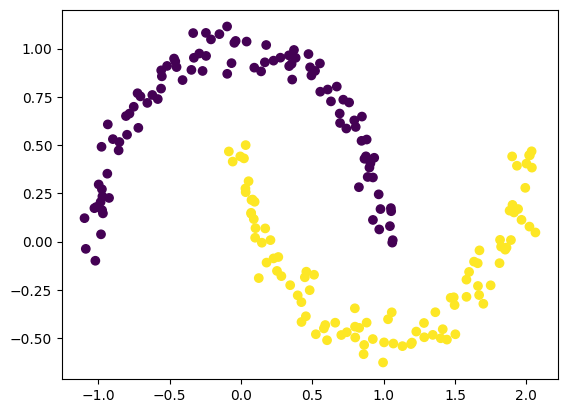

In [121]:
import sklearn.datasets
X, y = sklearn.datasets.make_moons(n_samples=200, shuffle=True, noise=.06)
fig, ax = plt.subplots(1, 1)
ax.scatter(*(X.T), c=y)
plt.show()

Note how K-Means it self does not work on this data-set, as opposed to Spectral Clustering.

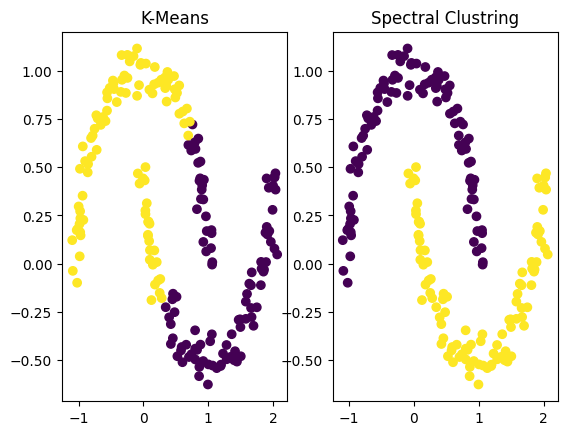

In [122]:
from sklearn.cluster import SpectralClustering, KMeans

clustering = SpectralClustering(n_clusters=2, n_neighbors=20, affinity='nearest_neighbors').fit(X)
kmeans = KMeans(2).fit(X)

fig, ax = plt.subplots(1, 2)
ax[0].set_title("K-Means")
ax[0].scatter(*(X.T), c=kmeans.labels_)
ax[1].set_title("Spectral Clustring")
ax[1].scatter(*(X.T), c=clustering.labels_)


Let's try to implement Spectral Clustering.
You may use the [NearestNeighbors](https://scikit-learn.org/stable/modules/neighbors.html) algorithm from sklearn to speed up things a bit.

You can try with different Laplacians if you want.

Hints to make it work:
 - Use weighted adjacency matrix (mode='distance' for `kneighbors_graph`)
 - n_neighbors=2 and 3 eigenvectors worked well for us.

C:\Users\jaco6\AppData\Local\Temp\ipykernel_13304\798348023.py:6: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  moons = nx.from_scipy_sparse_matrix(nbrs.kneighbors_graph(X, mode='distance'))


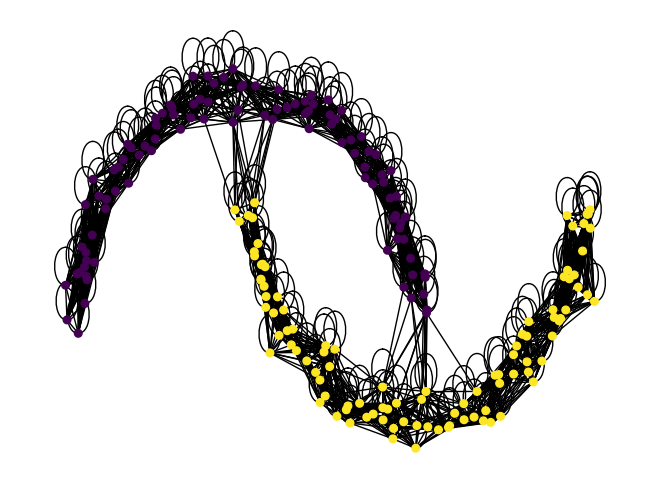

In [123]:
from sklearn.neighbors import NearestNeighbors

# Comstruct nearest neighbor graph.
nbrs = NearestNeighbors(n_neighbors=20).fit(X)

moons = nx.from_scipy_sparse_matrix(nbrs.kneighbors_graph(X, mode='distance'))

# Plot the graph that we just computed.
nx.draw(moons, pos=X, node_size=30, node_color=y)

[0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0
 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0]


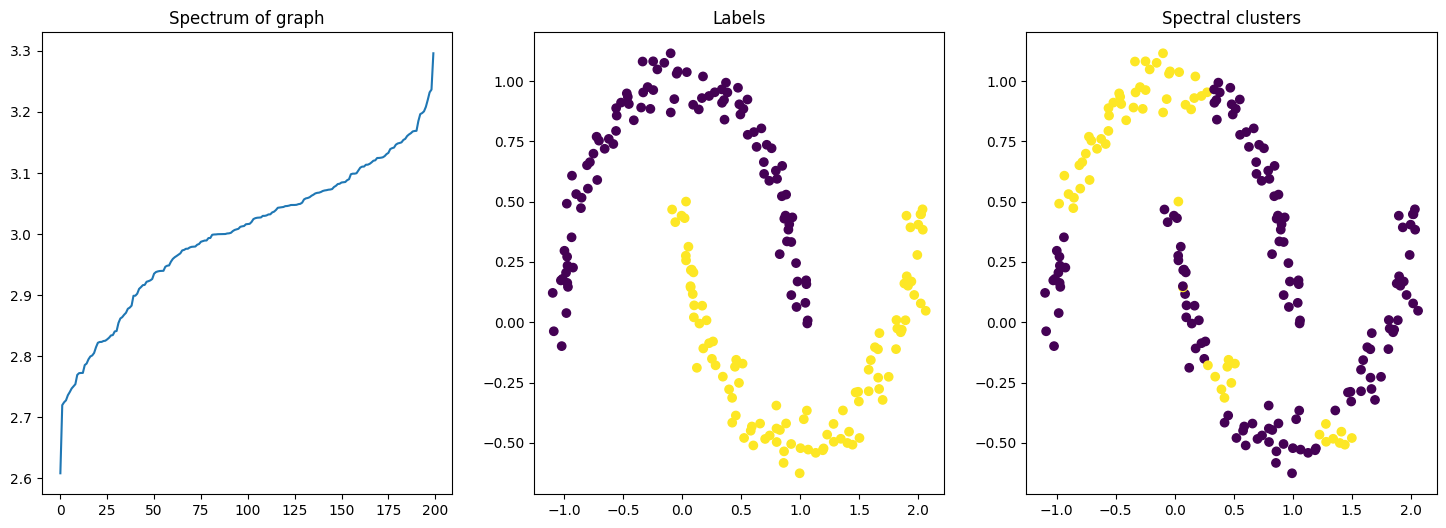

In [133]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import normalize
from scipy.linalg import inv

y_clust = np.zeros(X.shape[0])  # Replace this with your actual labels (if you have any)

def spectral_clustering(X, n_neighbors=3, n_clusters=2, laplacian_type='unnormalized'):
    # Step 1: Construct the adjacency matrix using k-nearest neighbors
    A = kneighbors_graph(X, n_neighbors=n_neighbors, mode='distance', include_self=False)

    A = A.toarray()  # Convert sparse matrix to dense

    I = np.identity(len(A))

    # Step 2: Construct degree matrix D
    D = np.sum(A > 0, axis=1)  # Degree is the sum of non-zero entries along rows
    D = np.diag(D)  # Diagonal matrix D where each diagonal element is the degree

    # Compute the inverse square root of D: D^(-1/2)
    D_inv_sqrt = np.diag(1 / np.sqrt(np.diagonal(D)))  # Efficient computation for diagonal D

    # Step 3: Compute Laplacian L
    if laplacian_type == 'unnormalized':
        L = D - A
    elif laplacian_type == 'normalized_sym':
        L = I - D_inv_sqrt@ A @ D_inv_sqrt  # Symmetric normalized Laplacian

    # Step 4: Compute the eigenvectors of the Laplacian
    eigvals, eigvecs = np.linalg.eigh(L)  # Compute eigenvalues and eigenvectors

    # Step 5: Take the first few eigenvectors (ignoring the first eigenvector corresponding to eigenvalue 0)
    eigvecs = eigvecs[:, 1:n_clusters + 1]  # Get the first n_clusters eigenvectors (ignoring the first one)

    # Step 6: Normalize the eigenvectors
    eigvecs_normalized = normalize(eigvecs, axis=1)  # Normalize each eigenvector (row-wise)

    # Step 7: Perform k-means clustering on the eigenvectors
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(eigvecs_normalized)

    return kmeans.labels_, eigvals

# Run the spectral clustering
labels, eigvals = spectral_clustering(X, n_neighbors=3, n_clusters=2, laplacian_type='unnormalized')

print(labels)

# Plotting
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot the spectrum of eigenvalues
ax[0].plot(eigvals)
ax[0].set_title("Spectrum of graph")

# Scatter plot of the original data points (use y_clust or any actual labels)
ax[1].scatter(X[:, 0], X[:, 1], c=y)
ax[1].set_title("Labels")

# Scatter plot of the data points colored by the spectral clustering labels
ax[2].scatter(X[:, 0], X[:, 1], c=labels)
ax[2].set_title("Spectral clusters")

plt.show()
